# Create geojson file from polygon shapefile

Create a geojson polygon file from a shapefile. As an example, we will use BOEM lease blocks and protraction
areas in the Gulf of Mexico.

0. Get shapefile polygon data for Gulf of Mexico lease blocks here: https://www.data.boem.gov/Main/Mapping.aspx. 
   I added these into the repository into a data folder, and added the data folder to my .gitignore file so I'm not 
   tracking them. 
   
1. Load shapefile using geopandas

2. Plot using plotly. Cloropleth map & basemap if possible

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

## 1. Load Shapefile using GPD

In [2]:
# file_name = r'data/blocks/blocks.shp'
file_name = r'data/protrac/protrac.shp'
gdf = gpd.read_file(file_name).set_index("PROT_NAME")

In [3]:
# Explore the geodataframe, looking at just the first 2 rows. Note that the polygon info is
# in the 'geometry' column.
gdf.head(5)

PROTRAC_  PROTRAC_ID MMS_REGION  \
PROT_NAME                                                                  
West Cameron Area                             2.0         2.0          G   
Main Pass Area                                3.0         3.0          G   
Main Pass Area, South and East Addition       4.0         4.0          G   
Breton Sound Area                             5.0         5.0          G   
Chandeleur Area                               6.0         6.0          G   

                                        PROT_NUMBE   PROT_APRV_ PROJ_ZONE_  \
PROT_NAME                                                                    
West Cameron Area                              LA1  01-JUL-2011         72   
Main Pass Area                                LA10  01-NOV-2000         72   
Main Pass Area, South and East Addition      LA10A  01-NOV-2000         72   
Breton Sound Area                            LA10B  01-NOV-2000         72   
Chandeleur Area                               LA11  01-NOV-2000         72   

                                        DATUM_CODE AREA_CODE PLAN_AREA_  \
PROT_NAME                                                                 
West Cameron Area                                0        WC        CGM   
Main Pass Area                                   0        MP        CGM   
Main Pass Area, South and East Addition          0        MP        CGM   
Breton Sound Area                                0        BS        CGM   
Chandeleur Area                                  0        CA        CGM   

                                                     PLAN_AREA1  \
PROT_NAME                                                         
West Cameron Area                        Central Gulf of Mexico   
Main Pass Area                           Central Gulf of Mexico   
Main Pass Area, South and East Addition  Central Gulf of Mexico   
Breton Sound Area                        Central Gulf of Mexico   
Chandeleur Area                          Central Gulf of Mexico   

                                                                                  geometry  
PROT_NAME                                                                                   
West Cameron Area                        POLYGON ((-93.06907 29.74544, -93.06824 29.697...  
Main Pass Area                           POLYGON ((-88.59006 29.64605, -88.59117 29.605...  
Main Pass Area, South and East Addition  POLYGON ((-87.76372 29.37205, -87.76478 29.342...  
Breton Sound Area                        POLYGON ((-88.96336 29.57219, -88.96432 29.531...  
Chandeleur Area                          MULTIPOLYGON (((-88.76841 29.93380, -88.76737 ...

In [4]:
# Get a list of the dataframe columns. 
gdf.columns

Index(['PROTRAC_', 'PROTRAC_ID', 'MMS_REGION', 'PROT_NUMBE', 'PROT_APRV_',
       'PROJ_ZONE_', 'DATUM_CODE', 'AREA_CODE', 'PLAN_AREA_', 'PLAN_AREA1',
       'geometry'],
      dtype='object')

<AxesSubplot:>

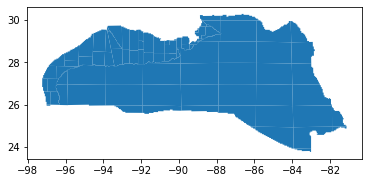

In [5]:
# Make a quick plot of the area, just to make sure it is what we expect - 
# the Gulf of Mexico
gdf.plot()

## 2. Plot using plotly
In this case we are sort of arbitrarily coloring based on "PROTRAC_ID". 

In [6]:
import plotly.express as px

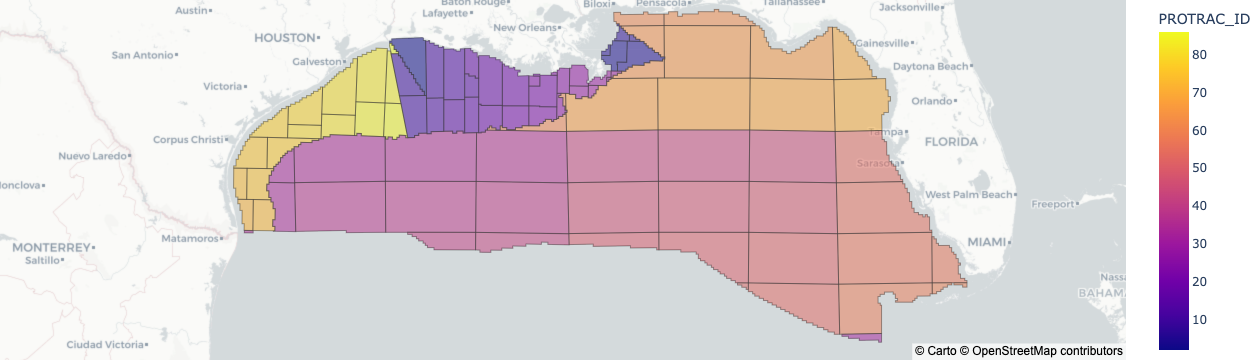

In [17]:
fig = px.choropleth_mapbox(gdf,
                           geojson=gdf.geometry,
                           locations=gdf.index,
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 27, "lon": -90},
                           opacity=.5,
                           color="PROTRAC_ID")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## NEXT STEP

Customize polygon colors.

In [19]:
# Choose a protraction ID as a test 
selected_id = 38

# Add a boolean column to the geodataframe to select the relevant protraction area
gdf['selected'] = gdf['PROTRAC_ID']==selected_id

Now, plot the map again but color by the "selected" column.

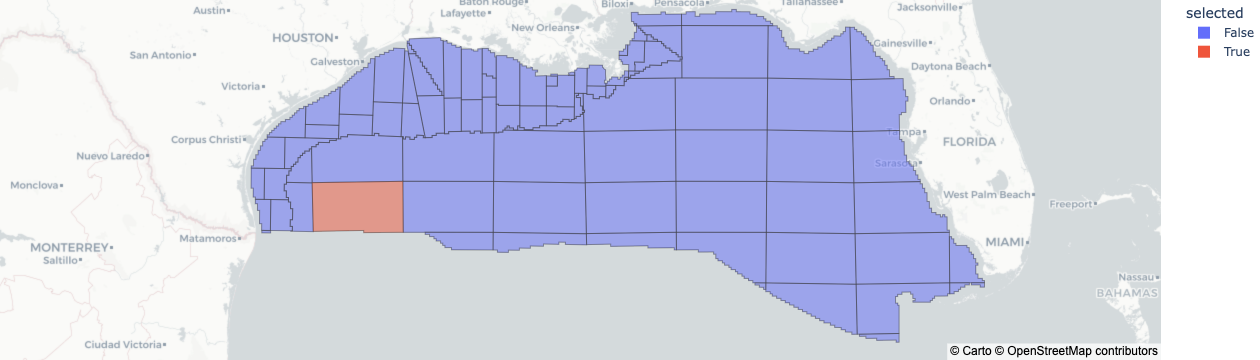

In [20]:
fig = px.choropleth_mapbox(gdf,
                           geojson=gdf.geometry,
                           locations=gdf.index,
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 27, "lon": -90},
                           opacity=.5,
                           color="selected")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [16]:
gdf

PROTRAC_  PROTRAC_ID  \
PROT_NAME                                                                
West Cameron Area                                      2.0         2.0   
Main Pass Area                                         3.0         3.0   
Main Pass Area, South and East Addition                4.0         4.0   
Breton Sound Area                                      5.0         5.0   
Chandeleur Area                                        6.0         6.0   
...                                                    ...         ...   
High Island Area                                      82.0        82.0   
High Island Area, East Addition                       83.0        83.0   
High Island Area, South Addition                      84.0        84.0   
High Island Area, East Addition, South Extension      85.0        85.0   
Sabine Pass Area                                      86.0        86.0   

                                                 MMS_REGION PROT_NUMBE  \
PROT_NAME                                                                
West Cameron Area                                         G        LA1   
Main Pass Area                                            G       LA10   
Main Pass Area, South and East Addition                   G      LA10A   
Breton Sound Area                                         G      LA10B   
Chandeleur Area                                           G       LA11   
...                                                     ...        ...   
High Island Area                                          G        TX7   
High Island Area, East Addition                           G       TX7A   
High Island Area, South Addition                          G       TX7B   
High Island Area, East Addition, South Extension          G       TX7C   
Sabine Pass Area                                          G        TX8   

                                                   PROT_APRV_ PROJ_ZONE_  \
PROT_NAME                                                                  
West Cameron Area                                 01-JUL-2011         72   
Main Pass Area                                    01-NOV-2000         72   
Main Pass Area, South and East Addition           01-NOV-2000         72   
Breton Sound Area                                 01-NOV-2000         72   
Chandeleur Area                                   01-NOV-2000         72   
...                                                       ...        ...   
High Island Area                                  01-NOV-2000         71   
High Island Area, East Addition                   01-NOV-2000         71   
High Island Area, South Addition                  01-NOV-2000         71   
High Island Area, East Addition, South Extension  01-NOV-2000         71   
Sabine Pass Area                                  01-NOV-2000         71   

                                                 DATUM_CODE AREA_CODE  \
PROT_NAME                                                               
West Cameron Area                                         0        WC   
Main Pass Area                                            0        MP   
Main Pass Area, South and East Addition                   0        MP   
Breton Sound Area                                         0        BS   
Chandeleur Area                                           0        CA   
...                                                     ...       ...   
High Island Area                                          0        HI   
High Island Area, East Addition                           0        HI   
High Island Area, South Addition                          0        HI   
High Island Area, East Addition, South Extension          0        HI   
Sabine Pass Area                                          0        SX   

                                                 PLAN_AREA_  \
PROT_NAME                                                     
West Cameron Area                                       CGM